#Importing all the Libraries and mounting google drive

In [1]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 5.0 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=7e9ab54c5dbf9bc7ea8cbae1c9924e2fdb4774d7a462b9f96f4e6c900fd1cd4c
  Stored in directory: /root/.cache/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built emoji


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns
sns.set_style("darkgrid")
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import re, string, nltk
import emoji, bz2
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.layers import Embedding
#from tensorflow.keras.preprocessing.sequence import pad_sequences   -------------------------> this ibrary is not working
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [4]:

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Importing datasets

In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/sem3/688/project/phase 2/datasets/amazon/train.csv',sep=",", header=None)
df1 = pd.read_csv('/content/gdrive/MyDrive/sem3/688/project/phase 2/datasets/amazon/test.csv',sep=",", header=None)
df.head()

,0,1,2
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [6]:
df.shape

(3600000, 3)

In [7]:
df1.shape

(400000, 3)

In [8]:
print(f"Trainning Data consists of {df.shape[0]} rows and {df.shape[1]} columns.")
print("\n")
print(f"Testing Data consists of {df1.shape[0]} rows and {df1.shape[1]} columns.")

Trainning Data consists of 3600000 rows and 3 columns.


Testing Data consists of 400000 rows and 3 columns.


In [9]:
izuo1 = df.loc[df[0] == 1]
izuo2 = df.loc[df[0] == 2]

In [10]:
train1 = izuo1[:100000]
train2 = izuo2[:100000]

In [11]:
train1 = train1.reset_index(drop=True)
train2 = train2.reset_index(drop=True)

In [12]:
#concading tran1 and train2
frames = [train1, train2]
result = pd.concat(frames)

In [13]:
result = result.reset_index(drop=True)

In [14]:
result

,0,1,2
0,1,Buyer beware,"This is a self-published book, and if you want..."
1,1,The Worst!,A complete waste of time. Typographical errors...
2,1,Oh please,I guess you have to be a romance novel lover f...
3,1,Awful beyond belief!,I feel I have to write to keep others from was...
4,1,Don't try to fool us with fake reviews.,It's glaringly obvious that all of the glowing...
...,...,...,...
199995,2,It Works!,Dr. Harvey Karp has come up with a way to help...
199996,2,Love this book!,We are expecting our first child and this book...
199997,2,Good basics book,We got this book upon a recommendation from an...
199998,2,Must read for new parents,I enjoyed this book and suggest reading it BEF...


In [15]:
# shape of data
print(f"Data consists of {result.shape[0]} rows and {result.shape[1]} columns.")

Data consists of 200000 rows and 3 columns.


In [16]:
# checking for null values
result.isna().sum()

0    0
1    9
2    0
dtype: int64

In [17]:
# dropping null values
result = result.dropna()

In [18]:
# checking for any duplicate in the data
result.duplicated().sum()

0

In [19]:
result[0].value_counts()

1    99997
2    99994
Name: 0, dtype: int64

Text(0.5, 1.0, 'Countplot for Sentiment Labels')

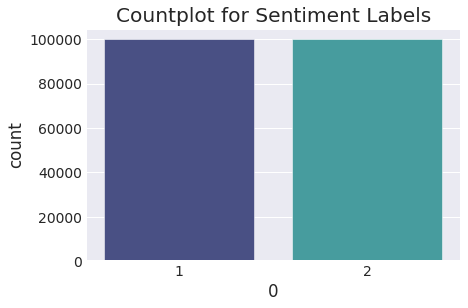

In [20]:
sns.countplot(result[0],palette="mako")
plt.title("Countplot for Sentiment Labels")

In [21]:
def clean_text(df, field):
    df[field] = df[field].str.replace(r"@"," at ")
    df[field] = df[field].str.replace("#[^a-zA-Z0-9_]+"," ")
    df[field] = df[field].str.replace(r"[^a-zA-Z(),\"'\n_]"," ")
    df[field] = df[field].str.replace(r"http\S+","")
    df[field] = df[field].str.lower()
    return df

clean_text(result,1)
clean_text(result,2)

,0,1,2
0,1,buyer beware,"this is a self published book, and if you want..."
1,1,the worst,a complete waste of time typographical errors...
2,1,oh please,i guess you have to be a romance novel lover f...
3,1,awful beyond belief,i feel i have to write to keep others from was...
4,1,don't try to fool us with fake reviews,it's glaringly obvious that all of the glowing...
...,...,...,...
199995,2,it works,dr harvey karp has come up with a way to help...
199996,2,love this book,we are expecting our first child and this book...
199997,2,good basics book,we got this book upon a recommendation from an...
199998,2,must read for new parents,i enjoyed this book and suggest reading it bef...


In [22]:
# Applying Lemmmatizer to remove tenses from texts.
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub('[^a-zA-Z0-9]',' ',text)
    #text= re.sub(emoji.get_emoji_regexp(),"",text)
    text = [lemmatizer.lemmatize(word) for word in text.split() if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

result["clean_title"] = result[1].apply(preprocess_text)
result["clean_text"] = result[2].apply(preprocess_text)

In [23]:
result.head(15)

,0,1,2,clean_title,clean_text
0,1,buyer beware,"this is a self published book, and if you want...",buyer beware,self published book want know read paragraph s...
1,1,the worst,a complete waste of time typographical errors...,worst,complete waste time typographical error poor g...
2,1,oh please,i guess you have to be a romance novel lover f...,oh please,guess romance novel lover one discerning one o...
3,1,awful beyond belief,i feel i have to write to keep others from was...,awful beyond belief,feel write keep others wasting money book seem...
4,1,don't try to fool us with fake reviews,it's glaringly obvious that all of the glowing...,try fool u fake review,glaringly obvious glowing review written perso...
5,1,sizes recomended in the size chart are not real,sizes are much smaller than what is recomended...,size recomended size chart real,size much smaller recomended chart tried put s...
6,1,mens ultrasheer,"this model may be ok for sedentary types, but ...",men ultrasheer,model may ok sedentary type active get around ...
7,1,another abysmal digital copy,"rather than scratches and insect droppings, th...",another abysmal digital copy,rather scratch insect droppings one random pix...
8,1,problem with charging smaller aaas,i have had the charger for more than two years...,problem charging smaller aaa,charger two year charge aa battery fine huge p...
9,1,"works, but not as advertised",i bought one of these chargers the instructio...,work advertised,bought one charger instruction say light stay ...


Text(0, 0.5, 'Text Length')

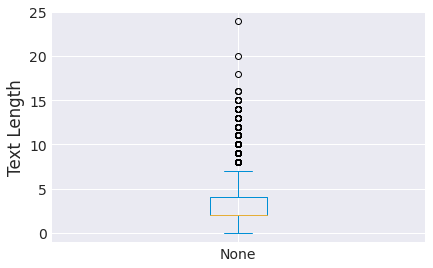

In [24]:
text_length = pd.Series([len(review.split()) for review in result["clean_title"]])
text_length.plot(kind="box")
plt.ylabel("Text Length")

Text(0, 0.5, 'Frequency')

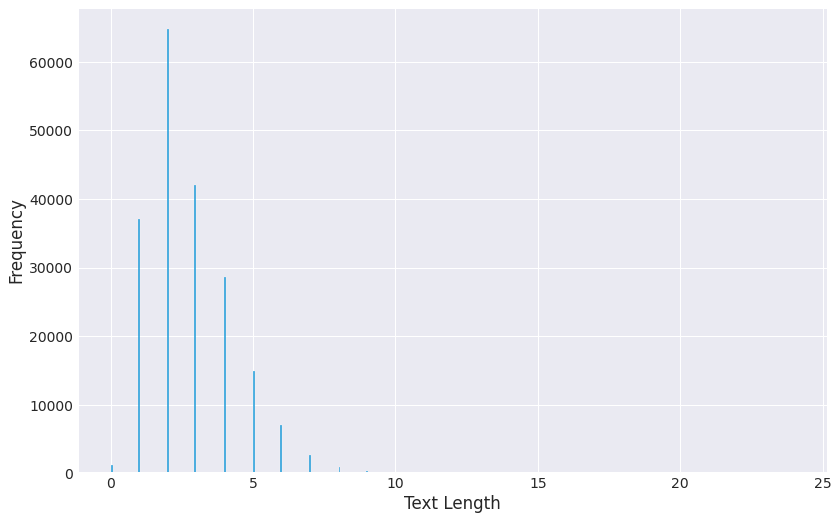

In [25]:
plt.figure(figsize=(12,8))
sns.histplot(text_length,palette="deep")
plt.xlabel("Text Length")
plt.ylabel("Frequency")

Text(0, 0.5, 'Text Length')

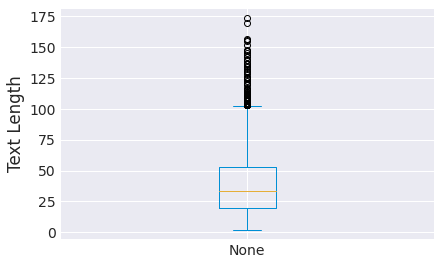

In [26]:
text_length = pd.Series([len(review.split()) for review in result["clean_text"]])
text_length.plot(kind="box")
plt.ylabel("Text Length")

Text(0, 0.5, 'Frequency')

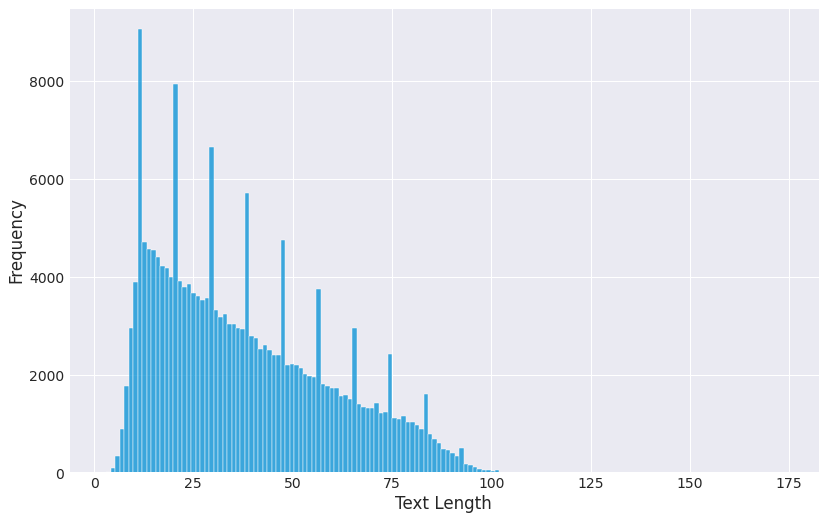

In [27]:
plt.figure(figsize=(12,8))
sns.histplot(text_length,palette="deep")
plt.xlabel("Text Length")
plt.ylabel("Frequency")

In [28]:
new_result = result[[0,"clean_title","clean_text"]]
new_result

,0,clean_title,clean_text
0,1,buyer beware,self published book want know read paragraph s...
1,1,worst,complete waste time typographical error poor g...
2,1,oh please,guess romance novel lover one discerning one o...
3,1,awful beyond belief,feel write keep others wasting money book seem...
4,1,try fool u fake review,glaringly obvious glowing review written perso...
...,...,...,...
199995,2,work,dr harvey karp come way help parent deal colic...
199996,2,love book,expecting first child book helpful used techni...
199997,2,good basic book,got book upon recommendation another parent th...
199998,2,must read new parent,enjoyed book suggest reading baby get unlike o...


In [29]:
new_result[0].unique()

array([1, 2])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(np.array(new_result["clean_text"]),np.array(new_result[0]), test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)

(149993,)
(49998,)


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf2 = TfidfVectorizer(use_idf=True, tokenizer=word_tokenize)
X_train_tf2 = tfidf2.fit_transform(X_train)
X_test_tf2 = tfidf2.transform(X_test)

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train_tf2, y_train)

RandomForestClassifier()

In [33]:
from sklearn.metrics import roc_auc_score
y_pred = rf.predict(X_test_tf2)
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_test, y_pred)
roc = roc_auc_score(y_test,y_pred)
print(f"Accuracy: {acc*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred)}")
print(report)

Accuracy: 83.99335973438937% and Roc Auc Score:0.8399960210794366
              precision    recall  f1-score   support

           1       0.83      0.85      0.84     24891
           2       0.85      0.83      0.84     25107

    accuracy                           0.84     49998
   macro avg       0.84      0.84      0.84     49998
weighted avg       0.84      0.84      0.84     49998



In [34]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
xgb = XGBClassifier(eval_metric="mlogloss")
xgb.fit(X_train_tf2, y_train)

XGBClassifier(eval_metric='mlogloss')

In [35]:
y_pred2 = xgb.predict(X_test_tf2)
acc2 = accuracy_score(y_pred2, y_test)
report2 = classification_report(y_test, y_pred2)
roc2 = roc_auc_score(y_test,y_pred2)
print(f"Accuracy: {acc2*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred2)}")
print(report2)

Accuracy: 76.78307132285292% and Roc Auc Score:0.7679715462871339
              precision    recall  f1-score   support

           1       0.75      0.80      0.77     24891
           2       0.79      0.74      0.76     25107

    accuracy                           0.77     49998
   macro avg       0.77      0.77      0.77     49998
weighted avg       0.77      0.77      0.77     49998



In [36]:
lgb = LGBMClassifier()
lgb.fit(X_train_tf2, y_train)

LGBMClassifier()

In [37]:
y_pred_lgb = lgb.predict(X_test_tf2)
acc_lgb = accuracy_score(y_pred_lgb, y_test)
report_lgb = classification_report(y_test, y_pred_lgb)
roc_lgb = roc_auc_score(y_test,y_pred_lgb)
print(f"Accuracy: {acc_lgb*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred_lgb)}")
print(report_lgb)

Accuracy: 82.8113124524981% and Roc Auc Score:0.8280475294316917
              precision    recall  f1-score   support

           1       0.84      0.81      0.82     24891
           2       0.82      0.84      0.83     25107

    accuracy                           0.83     49998
   macro avg       0.83      0.83      0.83     49998
weighted avg       0.83      0.83      0.83     49998



In [38]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tf2, y_train)

MultinomialNB()

In [39]:
y_pred3 = nb.predict(X_test_tf2)
acc3 = accuracy_score(y_pred3, y_test)
report3 = classification_report(y_test, y_pred3)
roc3 = roc_auc_score(y_test,y_pred3)
print(f"Accuracy: {acc3*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred3)}")
print(report3)

Accuracy: 83.06732269290772% and Roc Auc Score:0.8307651159509518
              precision    recall  f1-score   support

           1       0.82      0.85      0.83     24891
           2       0.85      0.81      0.83     25107

    accuracy                           0.83     49998
   macro avg       0.83      0.83      0.83     49998
weighted avg       0.83      0.83      0.83     49998



In [40]:
gb = GradientBoostingClassifier()
gb.fit(X_train_tf2, y_train)

GradientBoostingClassifier()

In [41]:
y_pred4 = gb.predict(X_test_tf2)
acc4 = accuracy_score(y_pred4, y_test)
report4 = classification_report(y_test, y_pred4)
roc4 = roc_auc_score(y_test,y_pred4)
print(f"Accuracy: {acc4*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred4)}")
print(report4)

Accuracy: 76.98307932317293% and Roc Auc Score:0.7699661334747016
              precision    recall  f1-score   support

           1       0.75      0.80      0.78     24891
           2       0.79      0.74      0.76     25107

    accuracy                           0.77     49998
   macro avg       0.77      0.77      0.77     49998
weighted avg       0.77      0.77      0.77     49998



In [42]:
dt = DecisionTreeClassifier()
dt.fit(X_train_tf2, y_train)
y_pred5 = dt.predict(X_test_tf2)
acc5 = accuracy_score(y_pred5, y_test)
report5 = classification_report(y_test, y_pred5)
roc5 = roc_auc_score(y_test,y_pred5)
print(f"Accuracy: {acc5*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred5)}")
print(report5)

Accuracy: 71.93487739509581% and Roc Auc Score:0.7193236618479371
              precision    recall  f1-score   support

           1       0.72      0.71      0.72     24891
           2       0.72      0.73      0.72     25107

    accuracy                           0.72     49998
   macro avg       0.72      0.72      0.72     49998
weighted avg       0.72      0.72      0.72     49998



In [43]:
from sklearn.metrics import precision_score
ps = precision_score(y_test, y_pred)
ps_lgb = precision_score(y_test,y_pred_lgb)
ps2 = precision_score(y_test, y_pred2)
ps3 = precision_score(y_test, y_pred3)
ps4 = precision_score(y_test, y_pred4)
ps5 = precision_score(y_pred5,y_test)

In [44]:
accuracys = [acc,acc2,acc3,acc4,acc5,acc_lgb]
roc_scores = [roc, roc2, roc3, roc4,roc5, roc_lgb]
precision_scores = [ps,ps2,ps3,ps4,ps5,ps_lgb]
models = {"Random Forest":rf,"XGboost":xgb,"Naive Bayes":nb,"Gradient Boosting":gb,"Decision Tree":dt,"LGB Machine":lgb}

model_df = pd.DataFrame({"Models":models.keys(),"Accuracy":accuracys,"Precision Score":precision_scores,"Roc Scores": roc_scores}).sort_values("Roc Scores",ascending=False)

In [45]:
# Summary of Machine Learning Models Performance
model_df

,Models,Accuracy,Precision Score,Roc Scores
0,Random Forest,0.839934,0.829226,0.839996
2,Naive Bayes,0.830673,0.815975,0.830765
5,LGB Machine,0.828113,0.837147,0.828048
3,Gradient Boosting,0.769831,0.752443,0.769966
1,XGboost,0.767831,0.749953,0.767972
4,Decision Tree,0.719349,0.713511,0.719324


In [46]:
from sklearn.model_selection import train_test_split
X = new_result["clean_text"]
y = new_result[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
display(X_train.shape)
display(X_test.shape)

(149993,)

(49998,)

In [47]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [48]:
# using tokenizer to transform text messages into training and testing set
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [49]:
X_train_seq_padded = pad_sequences(X_train_seq, maxlen=64)
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=64)

In [50]:
X_train_seq_padded[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,   331,    42,  1213,
       10528,   103,    14,    67,   103,    92,    24,   115,    50,
         780,    24,   256,  2260,    42,   115,    24,    10,  3930,
        5316,   943,   103,  8793,   188,    67,   115,    42,   760,
          50], dtype=int32)

Bidirectional LSTM¶

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          7614080   
                                                                 
 bidirectional (Bidirectiona  (None, 200)              132000    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               25728     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 7,771,937
Trainable params: 7,771,937
Non-trainable params: 0
_________________________________________________________________


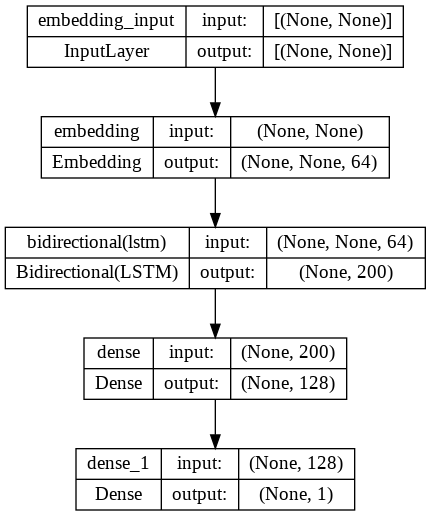

In [51]:
# construct model
BATCH_SIZE = 64

from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1,64))
model.add(Bidirectional(LSTM(100, dropout=0,recurrent_dropout=0)))
model.add(Dense(128, activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile("adam","binary_crossentropy",metrics=["accuracy"])
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [52]:
# Used for preventing ovefitting
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5,verbose=True)

In [53]:
history = model.fit(X_train_seq_padded, y_train,batch_size=BATCH_SIZE,epochs=15,
                    validation_data=(X_test_seq_padded, y_test),callbacks=[early_stop])

Epoch 1/15
2344/2344 [==============================] - 50s 18ms/step - loss: -26857.2520 - accuracy: 0.5007 - val_loss: -76955.2734 - val_accuracy: 0.4978
Epoch 2/15
2344/2344 [==============================] - 40s 17ms/step - loss: -160803.0781 - accuracy: 0.5007 - val_loss: -261305.9844 - val_accuracy: 0.4978
Epoch 3/15
2344/2344 [==============================] - 45s 19ms/step - loss: -385694.0000 - accuracy: 0.5007 - val_loss: -527529.8750 - val_accuracy: 0.4978
Epoch 4/15
2344/2344 [==============================] - 42s 18ms/step - loss: -688109.4375 - accuracy: 0.5007 - val_loss: -869398.0625 - val_accuracy: 0.4978
Epoch 5/15
2344/2344 [==============================] - 41s 18ms/step - loss: -1065025.0000 - accuracy: 0.5007 - val_loss: -1285598.1250 - val_accuracy: 0.4978
Epoch 6/15
2344/2344 [==============================] - 40s 17ms/step - loss: -1515485.5000 - accuracy: 0.5007 - val_loss: -1775608.2500 - val_accuracy: 0.4978
Epoch 7/15
2344/2344 [============================

In [54]:
from sklearn.metrics import roc_auc_score
pred_train = model.predict(X_train_seq_padded)
pred_test = model.predict(X_test_seq_padded)
print('LSTM Recurrent Neural Network baseline: ' + str(roc_auc_score(y_train, pred_train)))
print('LSTM Recurrent Neural Network: ' + str(roc_auc_score(y_test, pred_test)))

1563/1563 [==============================] - 7s 4ms/step
LSTM Recurrent Neural Network baseline: 0.5
LSTM Recurrent Neural Network: 0.5


In [55]:
model.evaluate(X_test_seq_padded, y_test)

1563/1563 [==============================] - 8s 5ms/step - loss: -9416453.0000 - accuracy: 0.4978


[-9416453.0, 0.49783992767333984]

Text(0.5, 1.0, 'Training and Validation Accuracy')

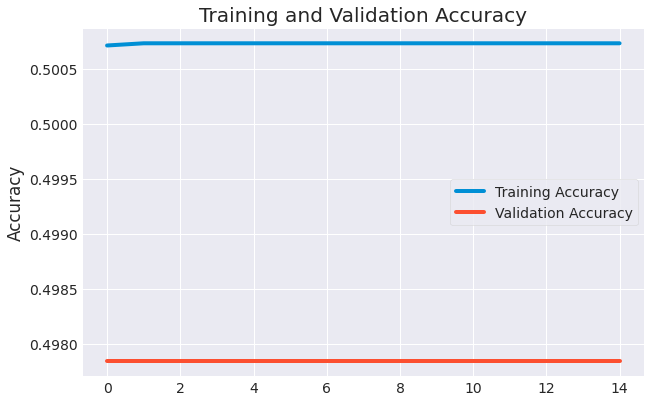

In [56]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(9,6))
plt.plot(acc,label="Training Accuracy")
plt.plot(val_acc,label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Loss')

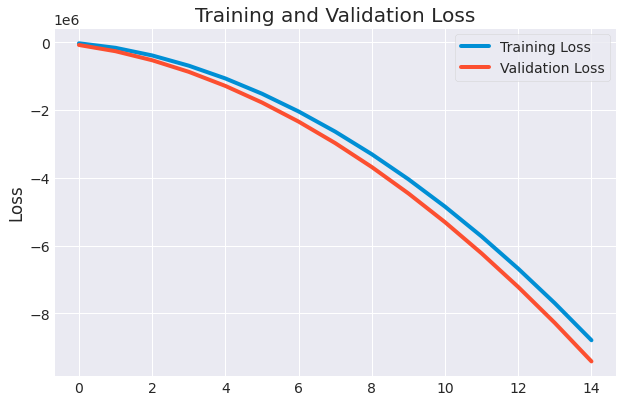

In [57]:
plt.figure(figsize=(9,6))
plt.plot(loss,label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.ylabel("Loss")
plt.title("Training and Validation Loss")